<a href="https://colab.research.google.com/github/bahramzada/Bina.az-RealEstate-Analysis/blob/main/binaaz_property_visual_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔴(EN) This notebook provides a comprehensive visual analysis of apartment listings in Azerbaijan using data from Bina.az. Key insights are derived from features such as price, square footage, number of rooms, building condition, and location. Visualizations include room-based pricing, per-square-meter comparisons, and legal status effects on property value.

🔴(AZ) Bu layihədə Bina.az platformasından əldə olunan mənzil məlumatları üzərində analitik və vizual təhlillər aparılmışdır. Qiymət, otaq sayı, sahə, bina növü və hüquqi status kimi dəyişənlər əsasında insight-lar çıxarılmışdır.

In [32]:
import pandas as pd

In [33]:
!curl -L -o apartment-prices-for-azerbaijan-market.zip https://www.kaggle.com/api/v1/datasets/download/azadshahvaladov/apartment-prices-for-azerbaijan-market

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  378k  100  378k    0     0   201k      0  0:00:01  0:00:01 --:--:--  684k


In [34]:
!unzip '/content/apartment-prices-for-azerbaijan-market.zip'

Archive:  /content/apartment-prices-for-azerbaijan-market.zip
  inflating: BakuApartmentData.csv   


In [35]:
df = pd.read_csv('/content/BakuApartmentData.csv')

In [36]:
print(df[['price', 'square', 'rooms']].describe())


              price        square         rooms
count  3.930200e+04  39302.000000  39302.000000
mean   2.322323e+05    106.039311      2.813648
std    1.827754e+05     59.856534      0.914880
min    9.600000e+03     12.000000      1.000000
25%    1.350000e+05     65.000000      2.000000
50%    1.870000e+05     94.000000      3.000000
75%    2.770000e+05    130.000000      3.000000
max    8.075000e+06   1600.000000     20.000000


In [37]:
df.isna().sum()

,0
Unnamed: 0,0
price,0
location,0
rooms,0
square,0
floor,0
new_building,0
has_repair,0
has_bill_of_sale,0
has_mortgage,0


In [38]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{column} overliers: {lower_bound:.2f} - {upper_bound:.2f}")
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Price üçün outlier-ləri silinir
df = remove_outliers_iqr(df, 'price')

# Square üçün də təmizlənir
df = remove_outliers_iqr(df, 'square')

# Rooms üçün də
df = remove_outliers_iqr(df, 'rooms')


price üçün sərhədlər: -78000.00 - 490000.00
square üçün sərhədlər: -25.00 - 215.00
rooms üçün sərhədlər: 0.50 - 4.50


In [39]:
print(df[['price', 'square', 'rooms']].describe())


               price        square         rooms
count   36328.000000  36328.000000  36328.000000
mean   201055.985411     96.121576      2.674246
std     90455.426058     39.038861      0.735080
min      9600.000000     12.000000      1.000000
25%    132000.000000     65.000000      2.000000
50%    180000.000000     90.000000      3.000000
75%    257000.000000    123.000000      3.000000
max    490000.000000    215.000000      4.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36328 entries, 0 to 39301
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        36328 non-null  int64  
 1   price             36328 non-null  int64  
 2   location          36328 non-null  object 
 3   rooms             36328 non-null  int64  
 4   square            36328 non-null  float64
 5   floor             36328 non-null  object 
 6   new_building      36328 non-null  int64  
 7   has_repair        36328 non-null  int64  
 8   has_bill_of_sale  36328 non-null  int64  
 9   has_mortgage      36328 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 3.0+ MB


In [41]:
df.reset_index(drop=True, inplace=True)

In [42]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [43]:
df['location']

,location
0,Azadlıq Prospekti m.
1,Şah İsmayıl Xətai m.
2,Elmlər Akademiyası m.
3,Elmlər Akademiyası m.
4,Nizami m.
...,...
36323,9-cu mikrorayon q.
36324,Memar Əcəmi m.
36325,İnşaatçılar m.
36326,Elmlər Akademiyası m.


In [44]:
df

,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage
0,284000,Azadlıq Prospekti m.,3,140.0,5/12,1,1,1,1
1,355000,Şah İsmayıl Xətai m.,3,135.0,19/20,1,1,1,1
2,245000,Elmlər Akademiyası m.,3,86.0,8/10,1,1,1,1
3,350000,Elmlər Akademiyası m.,4,174.0,12/15,1,1,1,1
4,255000,Nizami m.,2,93.0,10/16,1,1,1,1
...,...,...,...,...,...,...,...,...,...
36323,85500,9-cu mikrorayon q.,2,45.0,9/9,0,0,1,0
36324,102500,Memar Əcəmi m.,2,48.0,3/5,0,0,1,0
36325,143500,İnşaatçılar m.,3,65.0,3/5,0,0,1,0
36326,172000,Elmlər Akademiyası m.,4,90.0,3/5,0,0,1,0


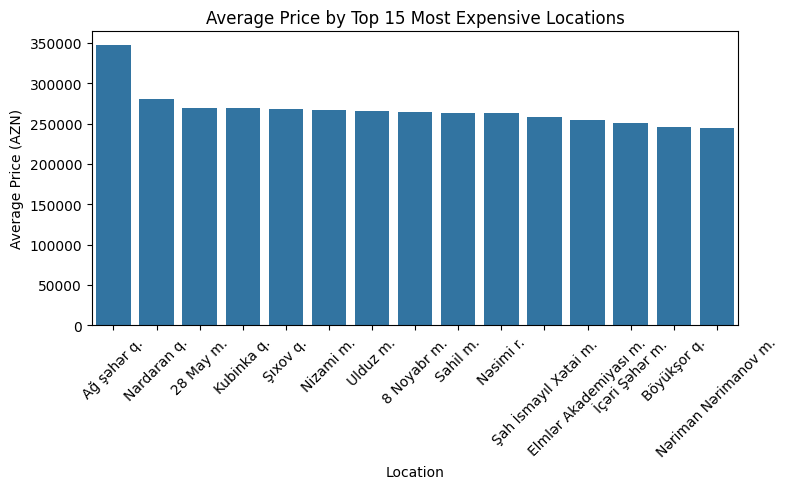

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns


# Location üzrə orta qiymət
district_price = df.groupby('location')['price'].mean().sort_values(ascending=False)

# Yalnız ilk 15 location
top5_district_price = district_price.head(15)

plt.figure(figsize=(8, 5))
sns.barplot(x=top5_district_price.index, y=top5_district_price.values)
plt.xticks(rotation=45)
plt.title('Average Price by Top 15 Most Expensive Locations')
plt.ylabel('Average Price (AZN)')
plt.xlabel('Location')
plt.tight_layout()
plt.show()


🔴(EN) Based on the analysis of average prices by district, Ağ Şəhər (White City) stands out as the area with the highest average property prices in the real estate market. This can be explained by the presence of new and prestigious buildings in the area. Next on the list are districts such as Nardaran and 28 May, which are active both residentially and commercially. Interestingly, some traditionally central areas—such as İçərişəhər (Old City)—rank lower, likely due to the age of the buildings and their renovation conditions.

🔴(AZ)
Rayonlara görə orta qiymət təhlili nəticəsində Ağ Şəhər qəsəbəsi əmlak bazarında ən yüksək orta qiymətə malik bölgədir. Bu ərazidə yerləşən binaların yeni və prestijli olması bu nəticəni izah edir. Növbəti sırada Nardaran və 28 May kimi həm yaşayış, həm də kommersiya baxımından aktiv zonalar gəlir. Ənənəvi olaraq mərkəz sayılan bəzi rayonların (məsələn, İçərişəhər) aşağı sıralarda olması, ehtimal ki, tikililərin yaşı və təmir vəziyyəti ilə bağlıdır.

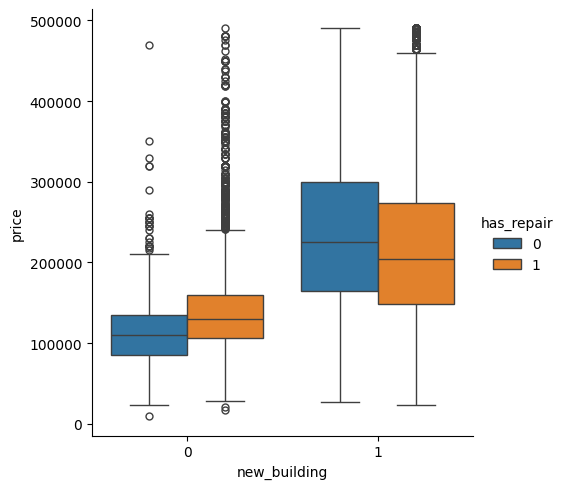

In [48]:
sns.catplot(x='new_building', y='price', hue='has_repair', data=df, kind='box')

🔴(EN) The analysis shows that in old buildings, renovated apartments are sold at significantly higher prices compared to unrenovated ones. However, in new buildings, the price differences are more widespread, and the renovation factor does not have a major impact on price. This indicates that in new constructions, location and size influence the price more than the renovation status.

🔴(AZ) Təhlil göstərir ki, köhnə binalarda təmir olunmuş evlər, təmirsiz olanlara nisbətən daha yüksək qiymətə satılır. Halbuki, yeni binalarda qiymət fərqləri daha geniş yayılıb və təmir faktoru qiymətə ciddi təsir etmir. Bu da göstərir ki, yeni binanın lokasiyası və sahəsi qiymətə daha çox təsir edir, nəinki təmir vəziyyəti.

Text(0.5, 1.0, 'Distribution of Price per Square Meter')

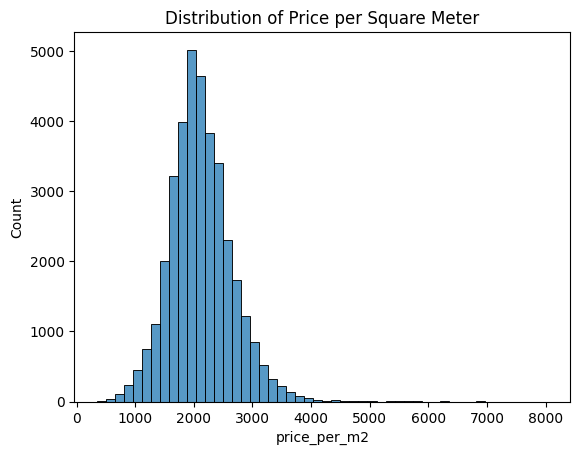

In [58]:
df['price_per_m2'] = df['price'] / df['square']
sns.histplot(df['price_per_m2'], bins=50)
plt.title('Distribution of Price per Square Meter')


> 🔴(EN) The analysis shows that price per square meter is mostly concentrated within the 1,500–2,500 AZN range, with the most common value being approximately 2,000 AZN/m². This indicates that the mid-range price segment dominates the real estate market. Prices of 4,000 AZN/m² and above are rarely observed and are mostly associated with elite and premium-class properties.


> 🔴(AZ) Təhlil göstərir ki, kvadrat metr üzrə qiymətlər əsasən 1,500–2,500 AZN aralığında cəmlənmişdir və bazarda ən çox rast gəlinən qiymət təxminən 2,000 AZN/m² təşkil edir. Bu, əmlak bazarında orta qiymət seqmentinin dominant olduğunu göstərir. 4,000 AZN/m² və daha yüksək qiymətlər isə nadir hallarda müşahidə olunur və əsasən elit və premium kateqoriyalı mülklərlə əlaqələndirilə bilər.





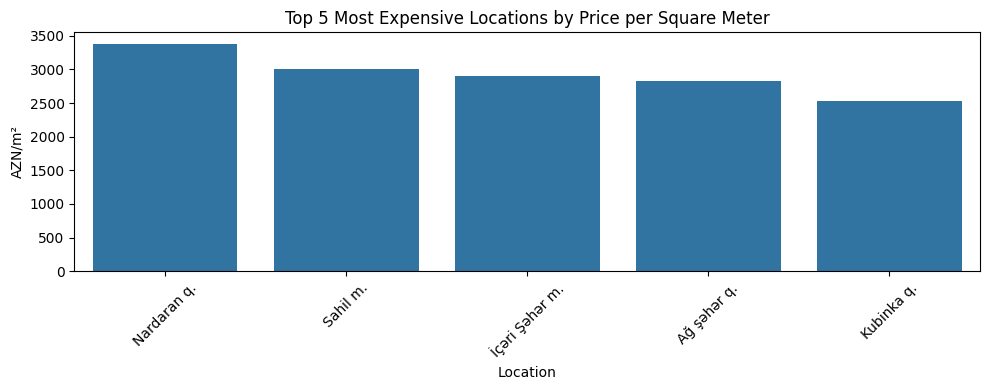

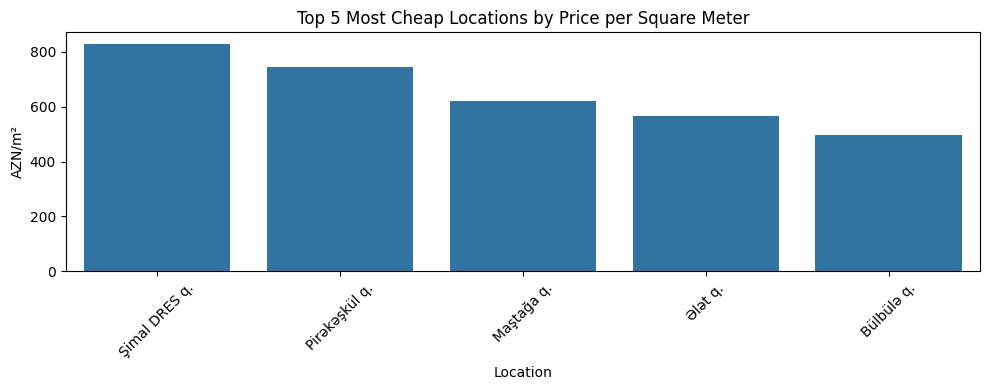

In [57]:
# Əvvəlcə price_per_m2 sütunu yaradiriq
df['price_per_m2'] = df['price'] / df['square']

# Location üzrə orta kvadrat metr qiyməti
location_price_m2 = df.groupby('location')['price_per_m2'].mean().sort_values(ascending=False)

# Ən bahalı 5 location
top5_locations = location_price_m2.head(5)

# Ən ucuz 5 location
bottom5_locations = location_price_m2.tail(5)

plt.figure(figsize=(10, 4))
sns.barplot(x=top5_locations.index, y=top5_locations.values)
plt.xticks(rotation=45)
plt.title("Top 5 Most Expensive Locations by Price per Square Meter")
plt.ylabel("AZN/m²")
plt.xlabel("Location")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x=bottom5_locations.index, y=bottom5_locations.values)
plt.xticks(rotation=45)
plt.title("Top 5 Most Cheap Locations by Price per Square Meter")
plt.ylabel("AZN/m²")
plt.xlabel("Location")
plt.tight_layout()
plt.show()




> 🔴(EN) The analysis of average price per square meter by location reveals that the most expensive area is Nardaran. It is followed by Sahil metro, İçərişəhər (Old City), Ağ Şəhər (White City), and Kubinka. These locations are characterized either by elite residential complexes or historic and central placements.

> Among the most affordable areas are Şimal DRES, Pirəkəşkül, Maştağa, Ələt, and Bülbülə—districts located farther from the city center and predominantly composed of individual houses. These results indicate that the real estate market in Azerbaijan offers strong representation for both premium and budget segments.





> 🔴(AZ) Lokasiyaya görə orta kvadrat metr qiymətlərinin təhlili göstərir ki, ən bahalı bölgə Nardaran qəsəbəsidir. Növbəti sıralarda Sahil metrosu, İçərişəhər, Ağ şəhər və Kubinka gəlir. Bu məkanlarda ya elit yaşayış kompleksləri, ya da tarixi və mərkəzi yerləşmələr müşahidə olunur.

> Ən ucuz bölgələr sırasında isə Şimal DRES, Pirəkəşkül, Maştağa, Ələt və Bülbülə kimi şəhər mərkəzindən uzaq və əsasən fərdi tikililərlə zəngin ərazilər yer alır. Bu nəticələr əmlak bazarında həm premium, həm də büdcə seqmentlərinin çox yaxşı təmsil olunduğunu göstərir.